In [21]:
import cv2
import numpy as np
import skimage.exposure
from matplotlib import pyplot as plt


In [22]:
def show_image(img, bg, newimg, n=3):
    f = plt.figure(figsize=(20, 20))

    f.add_subplot(1, 3, 1)
    # img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('Foreground')

    f.add_subplot(1, 3, 2)
    # bg = cv.cvtColor(bg, cv.COLOR_BGR2RGB)
    plt.imshow(bg)
    plt.title('Background')

    f.add_subplot(1, 3, 3)
    # newimg = cv.cvtColor(newimg, cv.COLOR_BGR2RGB)
    plt.imshow(newimg)
    plt.title('Result')

    plt.show(block=True)


In [23]:
# load image
img = cv2.imread('foreground/fg-1.jpg')

# convert to LAB
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)


In [24]:
# extract A channel
A = lab[:, :, 1]


In [25]:
# threshold A channel
thresh = cv2.threshold(A, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]


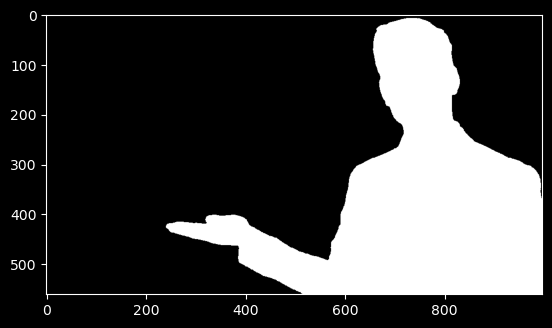

In [26]:
plt.imshow(thresh, cmap='gray')

In [27]:
# blur threshold image
blur = cv2.GaussianBlur(thresh, (0, 0), sigmaX=1,
                        sigmaY=1, borderType=cv2.BORDER_DEFAULT)

In [28]:
blur

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [29]:
# stretch so that 255 -> 255 and 127.5 -> 0
mask = skimage.exposure.rescale_intensity(blur, in_range=(
    127.5, 255), out_range=(0, 255)).astype(np.uint8)


In [30]:
# mask

In [31]:
# add mask to image as alpha channel
result = img.copy()
result = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask


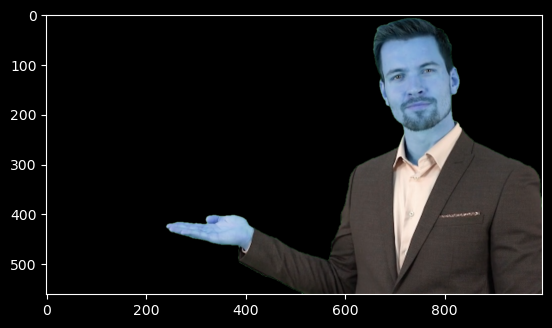

In [32]:
plt.imshow(result)

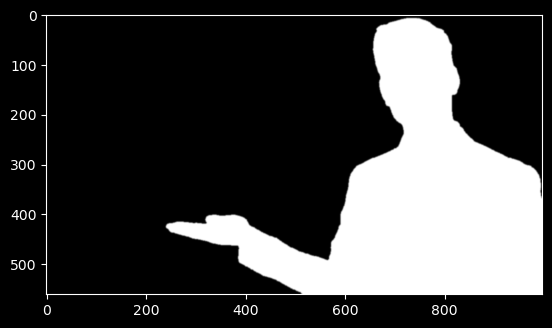

In [33]:
plt.imshow(blur,cmap='gray')

In [34]:
bg = cv2.imread('background/bg-1.jpg')
bg = cv2.resize(bg, (img.shape[1], img.shape[0]),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)

In [35]:
result = cv2.cvtColor(result, cv2.COLOR_BGRA2BGR)
blur = cv2.dilate(blur, np.ones((100, 100), np.uint8), iterations=10)

In [36]:
newImg = img.copy()

In [37]:
newImg[thresh == 0] = bg[thresh == 0] 

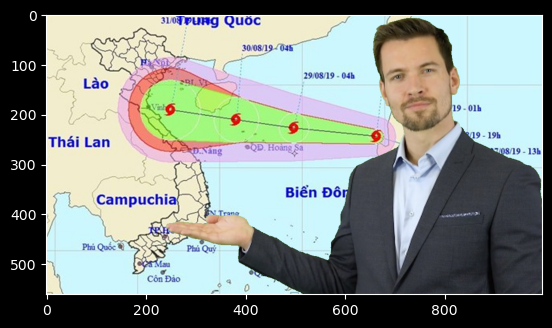

In [38]:
newImg = cv2.cvtColor(newImg, cv2.COLOR_BGR2RGB)
plt.imshow(newImg)

In [39]:
def removeGreen(fg, bg):
    if fg.shape != bg.shape:
        bg = cv2.resize(bg, (fg.shape[1], fg.shape[0]),
                       fx=0, fy=0, interpolation=cv2.INTER_CUBIC)
    lab = cv2.cvtColor(fg, cv2.COLOR_BGR2LAB)     # Convert to LAB color space

    A = lab[:, :, 1]
    thresh = cv2.threshold(A, 0, 255, cv2.THRESH_BINARY +
                          cv2.THRESH_OTSU)[1]    # Threshold the A channel

    newImg = fg.copy()
    newImg[thresh == 0] = bg[thresh == 0]

    return newImg


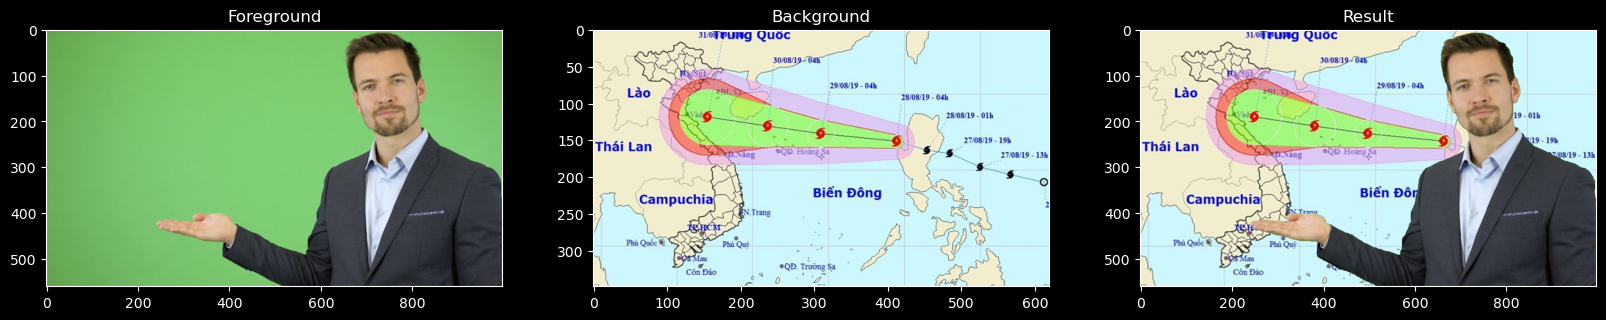

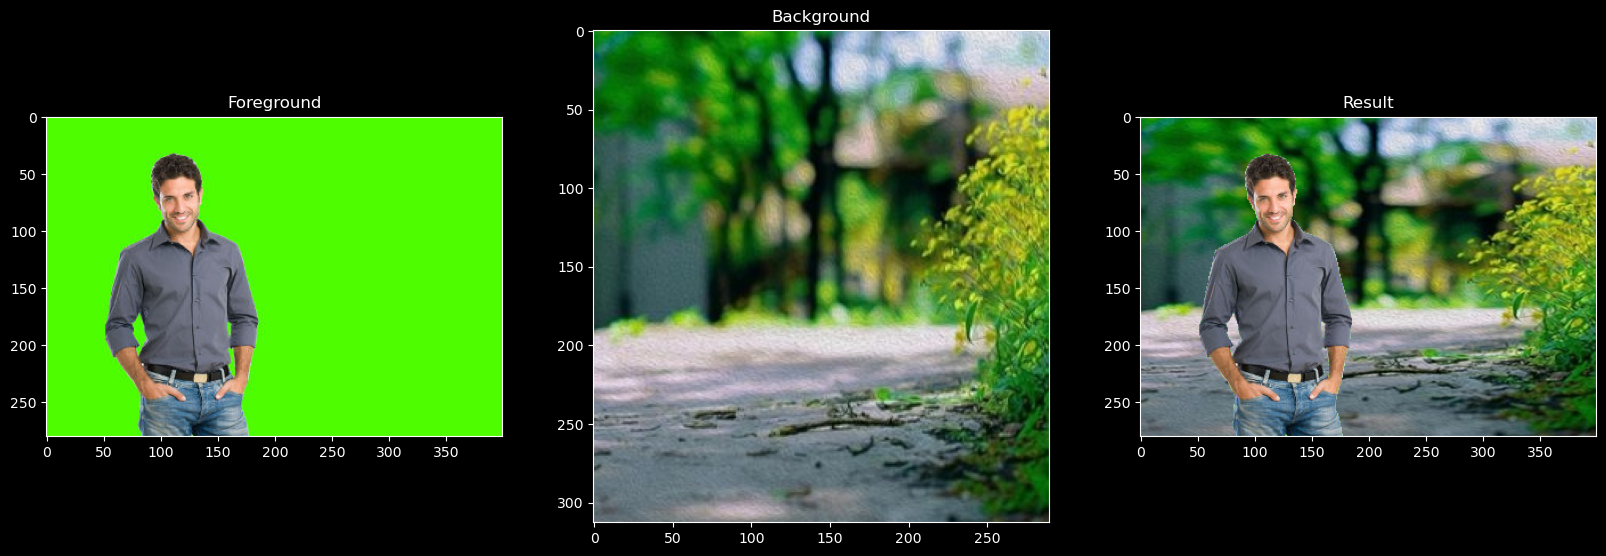

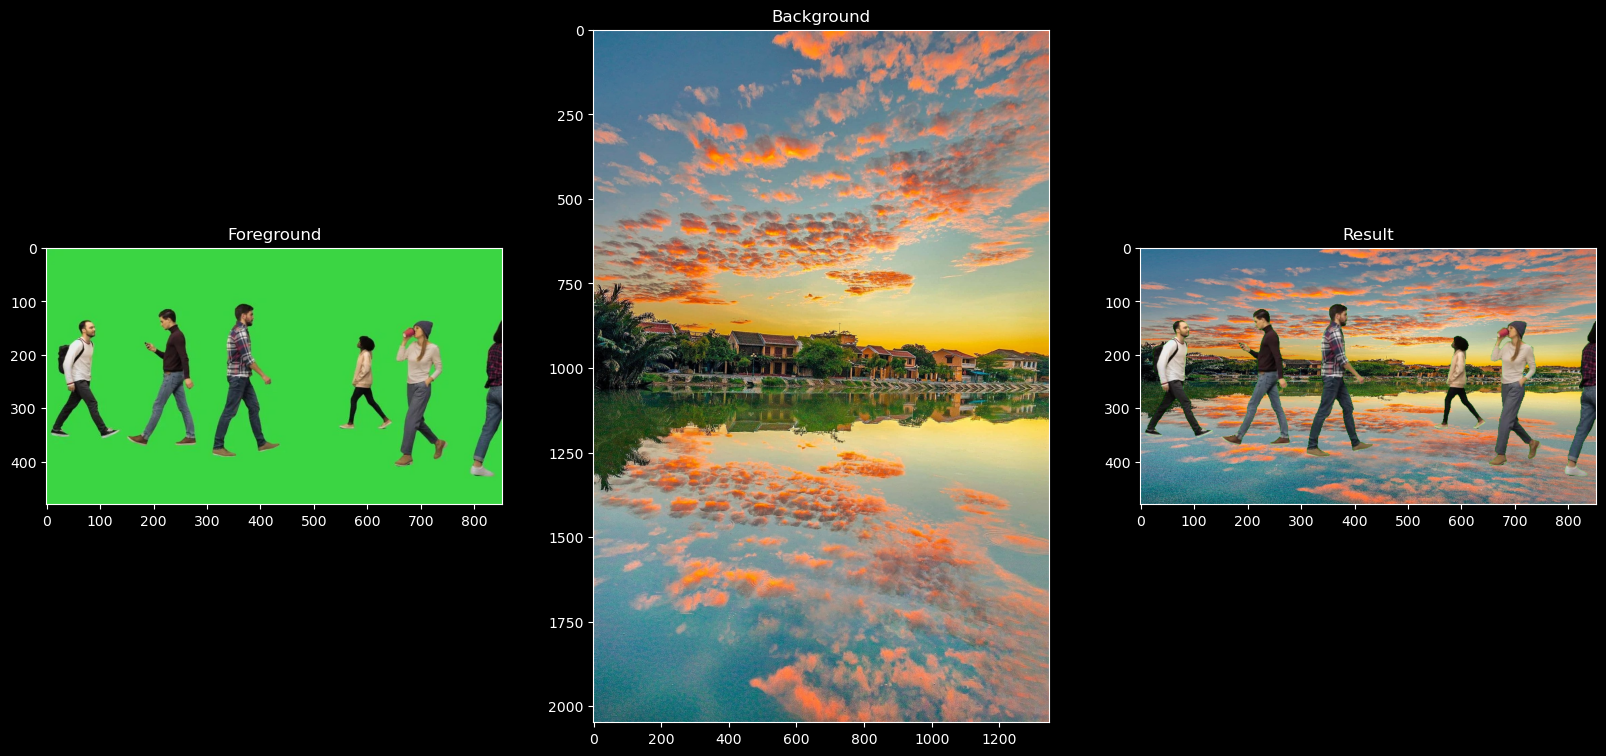

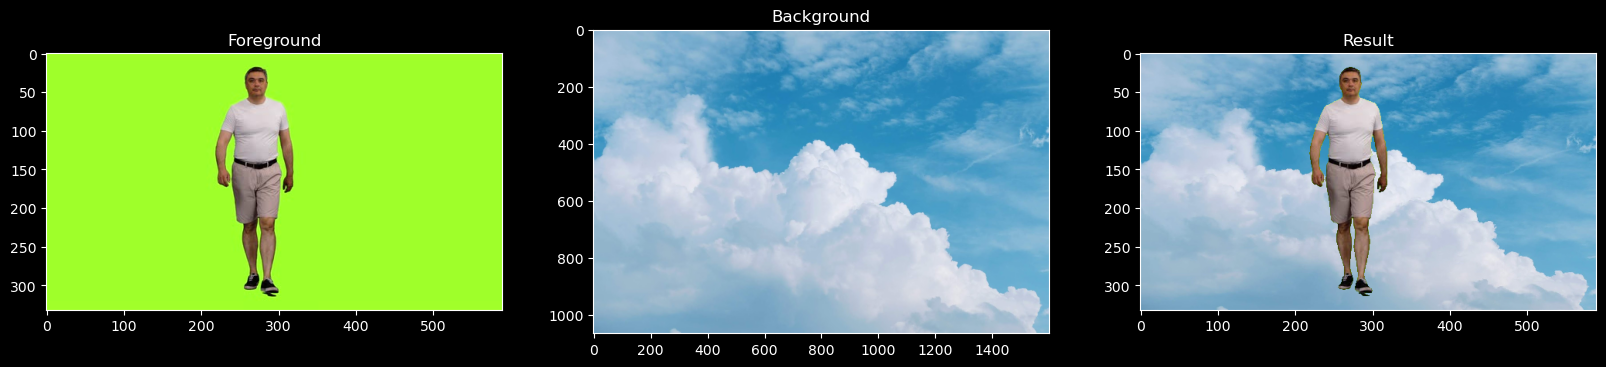

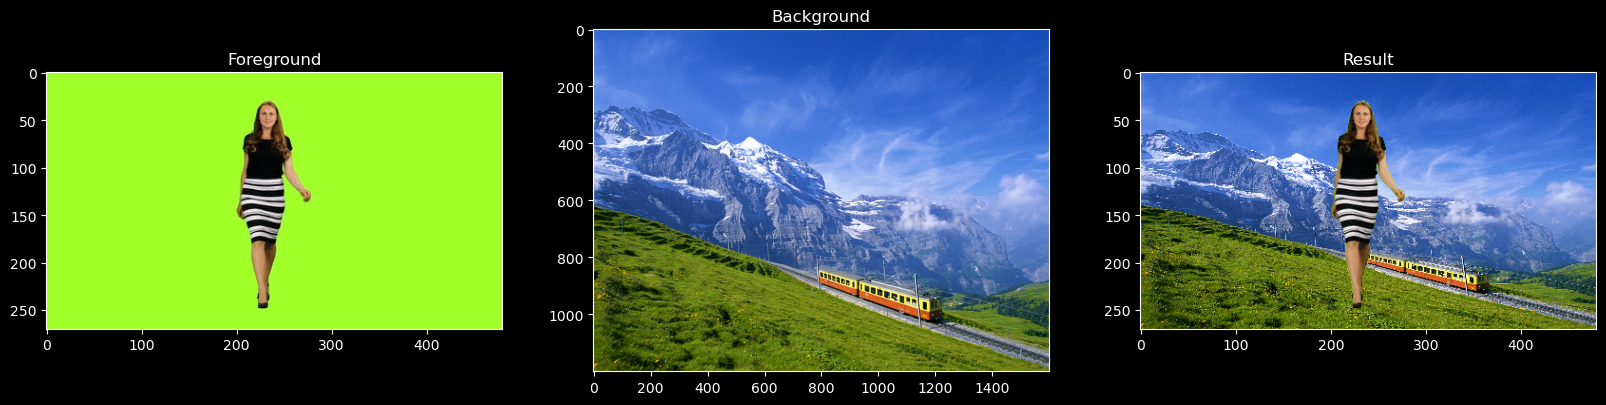

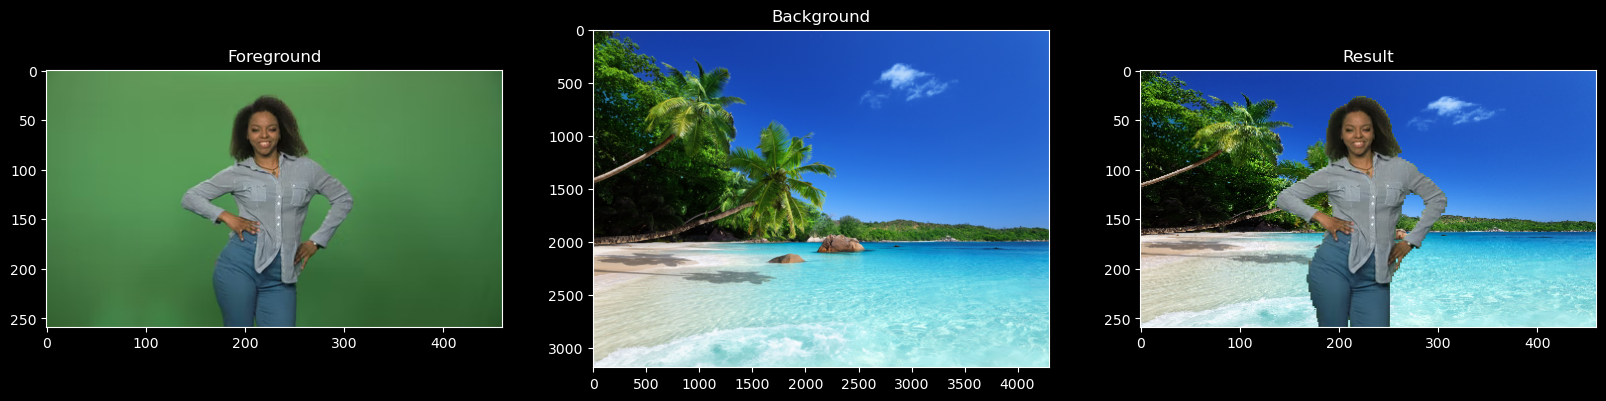

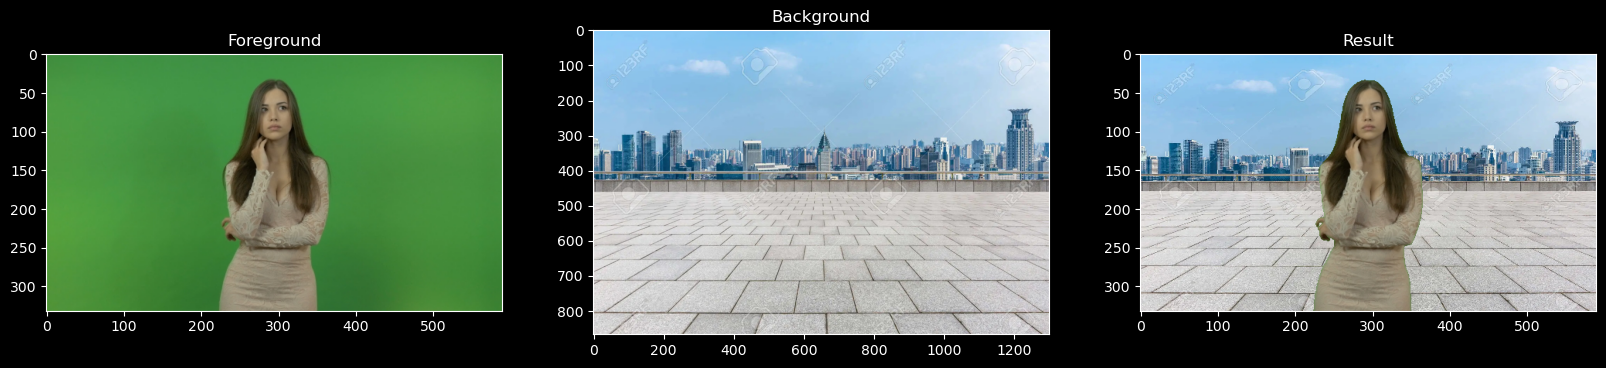

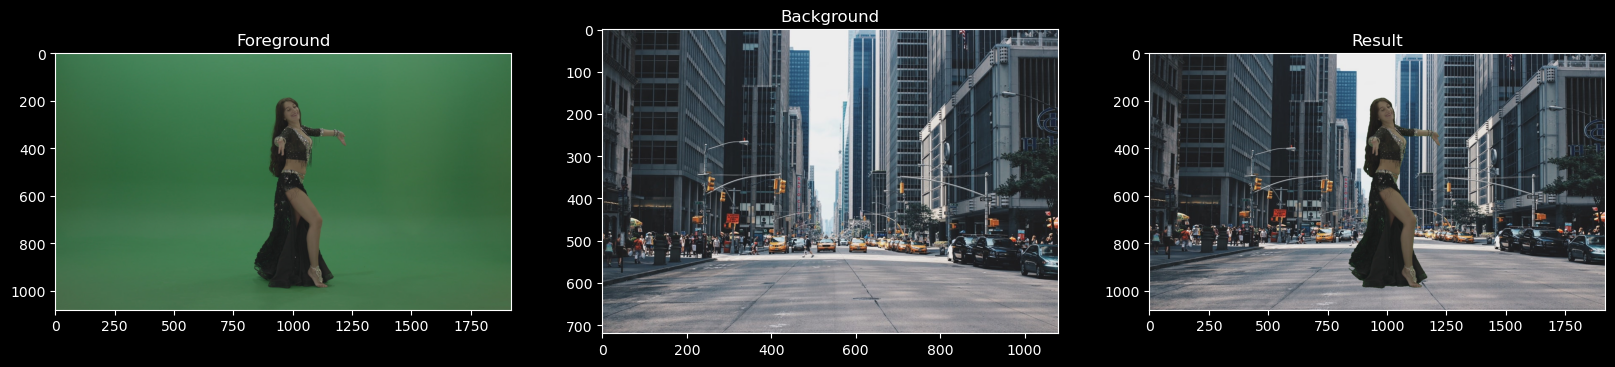

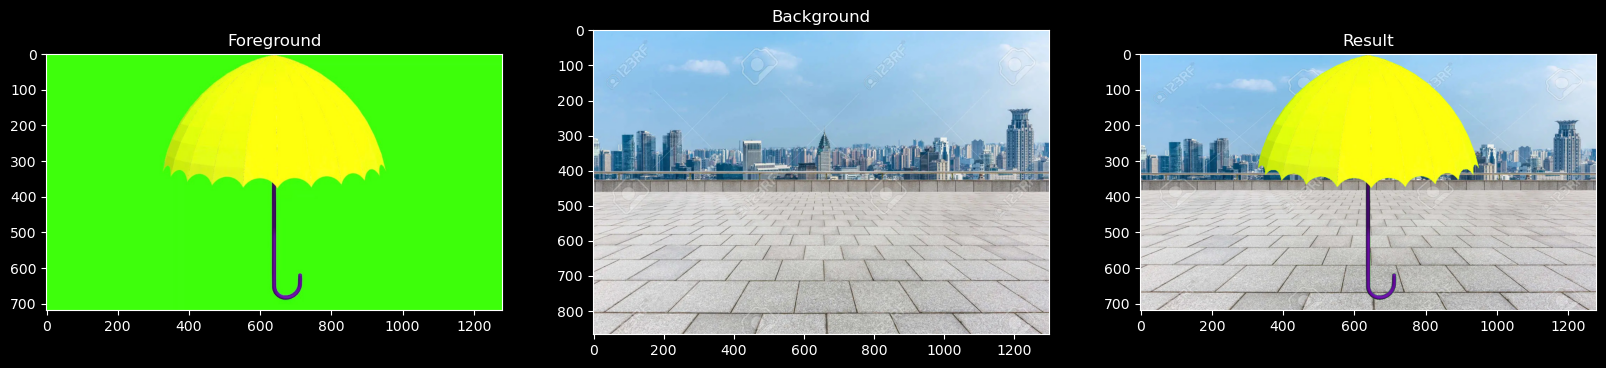

In [40]:
path_fg_folder = './foreground/'
path_bg_folder = './background/'
for i in range(1,10):
    fg_path = path_fg_folder + 'fg-' + str(i) + '.jpg'
    bg_path = path_bg_folder + 'bg-' + str(i) + '.jpg'
    fg = cv2.imread(fg_path,1)
    bg = cv2.imread(bg_path,1)
    newImg = removeGreen(fg.copy(),bg)
    fg = cv2.cvtColor(fg,cv2.COLOR_BGR2RGB)
    bg = cv2.cvtColor(bg,cv2.COLOR_BGR2RGB)
    newImg= cv2.cvtColor(newImg,cv2.COLOR_BGR2RGB)
    show_image(fg,bg,newImg)